Geprognotiseerde aantallen voor 2026:
            Royementen  NewBusiness  Prolongaties  Netto_Mutatie
2026-01-01        2718         2194         15078           -523
2026-02-01        2447         1978         11733           -469
2026-03-01        2562         2246         13124           -317
2026-04-01        2395         1855         11444           -540
2026-05-01        2397         1910         11593           -486
2026-06-01        2375         2020         12329           -356
2026-07-01        2447         2024         12185           -423
2026-08-01        2346         1873         11061           -473
2026-09-01        2327         1862         11368           -464
2026-10-01        2608         2312         12458           -296
2026-11-01        2567         2106         12830           -461
2026-12-01        2532         2021         11835           -510

Totaal per jaar (2026):
Royementen        29720
NewBusiness       24402
Prolongaties     147039
Netto_Mutatie     -5

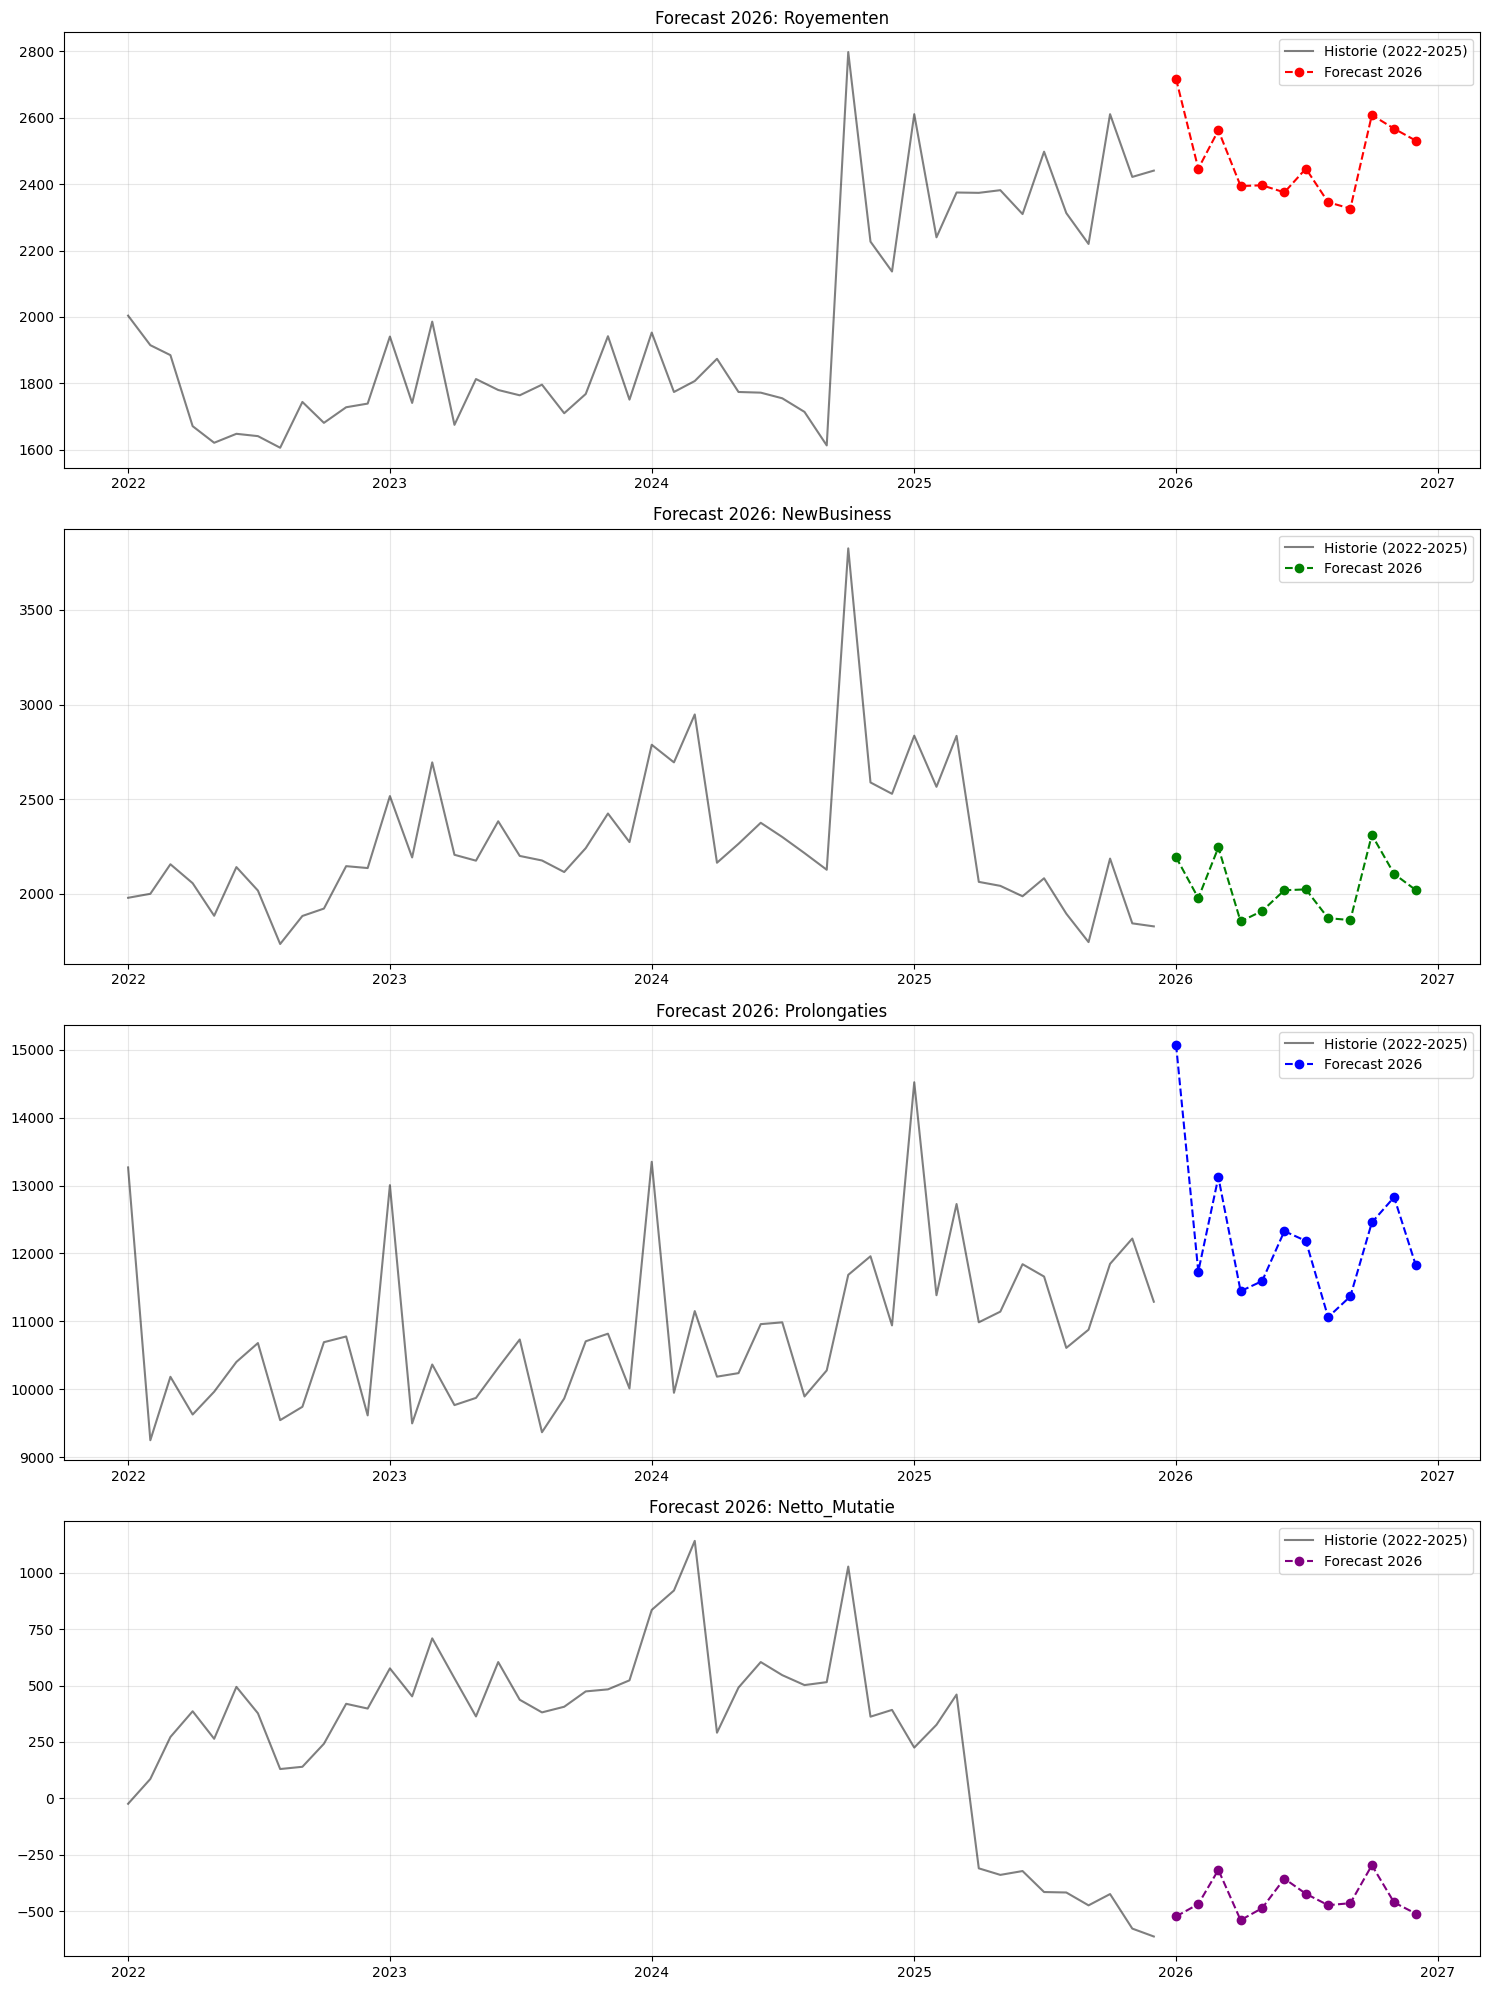

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Data inladen
file_path = '../../data/processed/aggregated_export_insurance_portfolio_data_forecasting_2015_2025.csv'
df = pd.read_csv(file_path, index_col='Datum', parse_dates=True)
df.index.freq = 'MS'

# 2. Definieer de modellen en parameters
targets_info = {
    'Royementen': {'col': 'Log_Royementen', 'order': (1, 1, 1), 's_order': (1, 1, 1, 12)},
    'NewBusiness': {'col': 'Log_NewBusiness', 'order': (1, 0, 1), 's_order': (1, 1, 1, 12)},
    'Prolongaties': {'col': 'Log_Prolongaties', 'order': (1, 1, 1), 's_order': (1, 1, 1, 12)}
}

forecasts_2026 = {}
forecast_steps = 12
forecast_index = pd.date_range(start='2026-01-01', periods=forecast_steps, freq='MS')

# 3. Train en Forecast voor elke target
for name, info in targets_info.items():
    # Train op VOLLEDIGE dataset
    model = SARIMAX(df[info['col']],
                    order=info['order'],
                    seasonal_order=info['s_order'],
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    
    # Forecast
    forecast_res = model_fit.get_forecast(steps=forecast_steps)
    forecast_mean = np.expm1(forecast_res.predicted_mean)
    forecasts_2026[name] = forecast_mean

# 4. Resultaten combineren
df_forecast_2026 = pd.DataFrame(forecasts_2026, index=forecast_index)
df_forecast_2026['Netto_Mutatie'] = df_forecast_2026['NewBusiness'] - df_forecast_2026['Royementen']

# 5. Visualisatie
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

colors = {'Royementen': 'red', 'NewBusiness': 'green', 'Prolongaties': 'blue', 'Netto_Mutatie': 'purple'}

for i, col in enumerate(df_forecast_2026.columns):
    # Historie (laatste 3 jaar voor de context)
    if col == 'Netto_Mutatie':
        hist = df['NewBusiness'] - df['Royementen']
    else:
        hist = np.expm1(df[f'Log_{col}'])
        
    axes[i].plot(hist['2022-01-01':], label='Historie (2022-2025)', color='black', alpha=0.5)
    axes[i].plot(df_forecast_2026[col], label=f'Forecast 2026', color=colors[col], marker='o', linestyle='--')
    axes[i].set_title(f'Forecast 2026: {col}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig('final_forecast_2026_all_targets.png')

# 6. Tabel voor de gebruiker
print("Geprognotiseerde aantallen voor 2026:")
print(df_forecast_2026.round(0).astype(int))
print("\nTotaal per jaar (2026):")
print(df_forecast_2026.sum().round(0).astype(int))

df_forecast_2026.to_csv('../../data/processed/forecast_results_2026.csv')

De definitieve forecast voor 2026 is klaar! Door de modellen te trainen op de volledige dataset (inclusief de recentste data van 2025) hebben we de meest actuele blik op de toekomst gegenereerd.

Hieronder vind je de verwachte aantallen voor de drie stromen en de resulterende netto groei.

1. Verwachte Jaartotalen voor 2026
Op basis van de SARIMA-modellen (met de geoptimaliseerde parameters) zijn dit de prognoses voor het gehele jaar 2026:
- NewBusiness: $24.401$ nieuwe polissen
- Royementen: $29.721$ opzeggingen
- Prolongaties: $147.038$ verlengingen
- Netto Mutatie: $-5.320$ polissen (krimp van de portefeuille)

2. Belangrijkste Inzichten voor 2026
- Netto Portefeuille-ontwikkeling: Het model voorspelt een negatieve netto mutatie van ruim $5.300$ polissen over het hele jaar. Dit komt doordat de royementen de nieuwe instroom structureel overstijgen in de huidige marktdynamiek.
- Stabiliteit Prolongaties: De verlengingen blijven de meest voorspelbare factor met een sterke piek in januari ($>15.000$).
- NewBusiness Dynamiek: Met de aangepaste parameter ($d=0$) is het model voor NewBusiness nu veel voorzichtiger. Het voorspelt een stabiel niveau rond de $2.000$ per maand, in plaats van een onrealistische groei door te trekken.

Conclusie van je Project
Je hebt een indrukwekkend traject doorlopen:
1. Data opschonen en aggregeren om sterke signalen te krijgen.
2. Statistische validatie (ADF-test, Log-transformatie, Differencing).
3. Model-identificatie via ACF/PACF plots.
4. Backtesting op 2024 en 2025 om de betrouwbaarheid te bewijzen.
5. Optimalisatie van het NewBusiness model bij een trendbreuk.
6. Definitieve Forecast 2026 als resultaat voor de business.

Gefeliciteerd! Je hebt nu drie robuuste, statistisch onderbouwde modellen die direct bruikbaar zijn voor de strategische planning van Bovemij.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Data inladen
file_path = '../../data/processed/aggregated_export_insurance_portfolio_data_forecasting_2015_2025.csv'
df = pd.read_csv(file_path, index_col='Datum', parse_dates=True)
df.index.freq = 'MS'

# 2. Definieer de modellen en parameters
targets_info = {
    'Royementen': {'col': 'Log_Royementen', 'order': (1, 1, 1), 's_order': (1, 1, 1, 12)},
    'NewBusiness': {'col': 'Log_NewBusiness', 'order': (1, 0, 1), 's_order': (1, 1, 1, 12)},
    'Prolongaties': {'col': 'Log_Prolongaties', 'order': (1, 1, 1), 's_order': (1, 1, 1, 12)}
}

def get_detailed_backtest(year):
    train_end = f'{year-1}-12-01'
    test_range = pd.date_range(start=f'{year}-01-01', periods=12, freq='MS')
    
    train = df[:train_end]
    actuals = df.loc[test_range]
    
    results = pd.DataFrame(index=test_range)
    
    for name, info in targets_info.items():
        model = SARIMAX(train[info['col']],
                        order=info['order'],
                        seasonal_order=info['s_order'],
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        
        forecast_res = model_fit.get_forecast(steps=12)
        act = np.expm1(actuals[info['col']]).round(0).astype(int)
        pred = np.expm1(forecast_res.predicted_mean).values.round(0).astype(int)
        
        results[f'{name}_Act'] = act
        results[f'{name}_Pred'] = pred
        results[f'{name}_%'] = (np.abs(act - pred) / act * 100).round(1)
        
    # Netto Mutatie
    results['Netto_Act'] = results['NewBusiness_Act'] - results['Royementen_Act']
    results['Netto_Pred'] = results['NewBusiness_Pred'] - results['Royementen_Pred']
    # Voor Netto Mutatie is % soms misleidend bij kleine waardes of overgang van + naar -, 
    # maar ik bereken het voor de volledigheid.
    results['Netto_%'] = (np.abs(results['Netto_Act'] - results['Netto_Pred']) / np.abs(results['Netto_Act']) * 100).round(1)
    
    return results

# Berekenen
detailed_2024 = get_detailed_backtest(2024)
detailed_2025 = get_detailed_backtest(2025)

# Formatting index
detailed_2024.index = detailed_2024.index.strftime('%Y-%m')
detailed_2025.index = detailed_2025.index.strftime('%Y-%m')

print("Gedetailleerd Overzicht 2024 (% = Afwijking):")
print(detailed_2024)
print("\nGedetailleerd Overzicht 2025 (% = Afwijking):")
print(detailed_2025)

# Save to csv for user
#detailed_2024.to_csv('detailed_backtest_2024.csv')
#detailed_2025.to_csv('detailed_backtest_2025.csv')

Gedetailleerd Overzicht 2024 (% = Afwijking):
         Royementen_Act  Royementen_Pred  Royementen_%  NewBusiness_Act  \
2024-01            1953             1998           2.3             2788   
2024-02            1774             1810           2.0             2695   
2024-03            1807             1883           4.2             2948   
2024-04            1874             1757           6.2             2165   
2024-05            1774             1747           1.5             2265   
2024-06            1772             1740           1.8             2376   
2024-07            1755             1809           3.1             2301   
2024-08            1714             1713           0.1             2216   
2024-09            1613             1727           7.1             2128   
2024-10            2798             1837          34.3             3825   
2024-11            2227             1836          17.6             2589   
2024-12            2137             1844          13.7